# Deskripsi Project

Operator telekomunikasi Interkoneksi ingin dapat memperkirakan perpindahan klien mereka. Jika diketahui bahwa pengguna berencana keluar, mereka akan ditawari kode promosi dan opsi paket khusus. Tim pemasaran Interkoneksi telah mengumpulkan beberapa data pribadi klien mereka, termasuk informasi tentang rencana dan kontrak mereka.

# Tujuan 

Adapun tujuan yang ingin dicapai diantaranya:
1. Memprediksi klien mana yang ingin berencana untuk keluar.
2. Membandingkan distribusi pembayaran bulanan seluruh klien aktif dengan klien yang sudah keluar.
3. Membandingkan prilaku klien pengguna telepon dan pengguna internet

# Deskripsi Data

Data terdiri dari file yang diperoleh dari berbagai sumber:
- `phone.csv` — informasi tentang layanan telepon
- `internet.csv` — informasi tentang layanan Internet
- `contract.csv` — informasi kontrak
- `personal.csv` — data pribadi klien
 
Di setiap file, kolom `customerID` berisi kode unik yang ditetapkan untuk setiap klien.
Informasi kontrak berlaku per 1 Februari 2020.


## Tahapan

- Tahap 1. Import Library
- Tahap 2. Import File
- Tahap 3. Checking Data 
- Tahap 4. Eksplorasi Data 


# Tahap 1. Imprort Library

Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Tahap 2. Import File 

Untuk mempermudah mengimport file mari gunakan sebuah fungsi

In [2]:
p1 = '/datasets/final_provider/phone.csv'
p2 = '/datasets/final_provider/internet.csv'
p3 = '/datasets/final_provider/contract.csv'
p4 = '/datasets/final_provider/personal.csv'

In [3]:
def load_file(path):
    data=pd.read_csv(path)
    return data

In [4]:
phone = load_file(p1)
phone.sample(5)

,customerID,MultipleLines
184,9142-KZXOP,No
6000,9259-PACGQ,Yes
2026,8337-MSSXB,No
5474,8008-ESFLK,No
4455,5092-STPKP,No


In [5]:
internet = load_file(p2)
internet.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5457,1904-WAJAA,DSL,Yes,Yes,Yes,No,No,No
1061,0661-WCQNQ,DSL,Yes,No,No,Yes,No,No
976,9091-WTUUY,DSL,Yes,No,Yes,Yes,Yes,No
1723,3988-RQIXO,Fiber optic,No,No,No,No,Yes,Yes
664,5337-IIWKZ,DSL,No,No,Yes,Yes,Yes,No


In [6]:
contract = load_file(p3)
contract.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
694,2682-KEVRP,2018-04-01,No,One year,Yes,Mailed check,20.05,417
6814,2267-WTPYD,2015-05-01,No,Month-to-month,No,Credit card (automatic),94.00,5438.95
4953,1627-AFWVJ,2017-09-01,No,Two year,No,Mailed check,19.40,554.25
5551,8457-XIGKN,2018-06-01,No,Month-to-month,Yes,Credit card (automatic),19.60,356.15
6476,1177-XZBJL,2015-09-01,No,One year,No,Bank transfer (automatic),64.15,3491.55


In [7]:
personal = load_file(p4)
personal.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
4456,1619-YWUBB,Female,0,Yes,No
3585,5913-INRQV,Male,1,Yes,No
3473,7599-FKVXZ,Male,0,Yes,No
6309,2169-RRLFW,Female,0,Yes,No
5887,4316-XCSLJ,Male,0,No,Yes


# Tahap 3. Checking Data

In [8]:
def check_data(data):
    print(data.head())
    print()
    print(data.info())
    print()
    print(f'Missing Value :\n{data.isna().sum()}')
    print()
    print(f'Duplicated :\n{data.duplicated().sum()}')
    


## Checking Data_1

In [9]:
check_data(phone)

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Missing Value :
customerID       0
MultipleLines    0
dtype: int64

Duplicated :
0


**Catatan**

Ada beberapa catatan:

1. Pada phone menyimpan data informasi tentang layanan telepon
2. Tidak terdapat missing value
3. Tidak terdapat duplikasi
4. Ukuran data : 6361 entries, 2 columns

## Checking Data_2

In [10]:
check_data(internet)

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService  

**Catatan**

Ada beberapa catatan:

1. Pada internet menyimpan data informasi tentang layanan Internet
2. Tidak terdapat missing value
3. Tidak terdapat duplikasi
4. Ukuran data : 5517 entries, 8 columns

In [11]:
check_data(contract)

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Co

**Catatan**

Ada beberapa catatan:

1. Pada contract menyimpan data tentang informasi kontrak.
2. Tidak terdapat missing value.
3. Tidak terdapat duplikasi
4. Ukuran data : 7043 entries, 8 columns
5. Kolom `BeginDate` dan `EndDate` tipe datanya object (dapat dirubah ke datetime).
6. Kolom `TotalCharges` tipe datanya object (dapat dirubah ke float).

In [12]:
check_data(personal)

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Missing Value :
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Duplicated :
0


**Catatan**

Ada beberapa catatan:

1. Pada personal menyimpan data pribadi klien
2. Tidak terdapat missing value
3. Tidak terdapat duplikasi
4. Ukuran data : 7043 entries, 5 columns

# Tahap 4. Ekplorasi Data

**1. Data1 - phone**

Sesuai dengan catatan sebelumnya, mari tampilkan isi dari variable phone

In [13]:
phone.sample(5)

,customerID,MultipleLines
1478,6035-RIIOM,Yes
4985,2696-NARTR,No
5215,4817-QRJSX,Yes
1995,2530-FMFXO,Yes
3520,5701-SVCWR,Yes


In [14]:
print('Banyaknya Custstomer:', phone['customerID'].nunique())

Banyaknya Custstomer: 6361


In [15]:
phone['MultipleLines'].value_counts()


No     3390
Yes    2971
Name: MultipleLines, dtype: int64

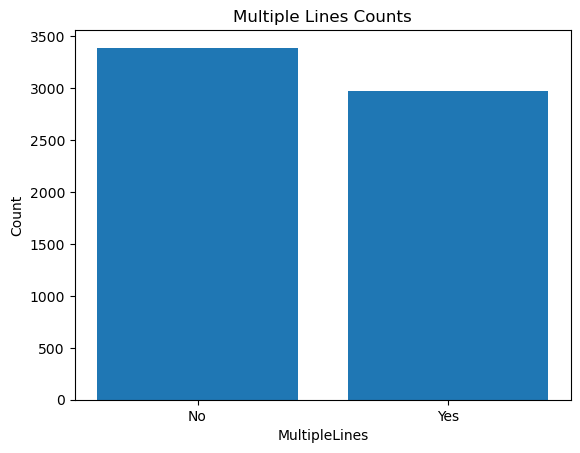

In [16]:
plt.bar(phone['MultipleLines'].value_counts().index, phone['MultipleLines'].value_counts().values)
plt.xlabel('MultipleLines')
plt.ylabel('Count')
plt.title('Multiple Lines Counts')
plt.show()

**Temuan**

1. Terdapat 6361 customer yang ada pada data ini.
1. Data tentang layanan telepon memuat 3390 orang yang memakai multiple line sebagai layanan yang dipilih.
2. Data tentang layanan telepon memuat 2971 orang yang tidak memakai multiple line sebagai layanan yang dipilih.

**2. Data2 - Internet**

Sesuai dengan catatan sebelumnya pada data ini, mari tampilkan datanya 

In [17]:
internet.sample(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5109,3439-GVUSX,DSL,No,No,No,No,No,No
1823,4967-WPNCF,DSL,Yes,Yes,Yes,Yes,Yes,Yes
3650,8218-FFJDS,DSL,Yes,Yes,No,Yes,Yes,Yes
1156,1621-YNCJH,Fiber optic,Yes,Yes,Yes,Yes,No,Yes
123,1679-JRFBR,Fiber optic,Yes,Yes,Yes,No,Yes,Yes


In [18]:
print('Banyaknya Custstomer:', internet['customerID'].nunique())

Banyaknya Custstomer: 5517


Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64


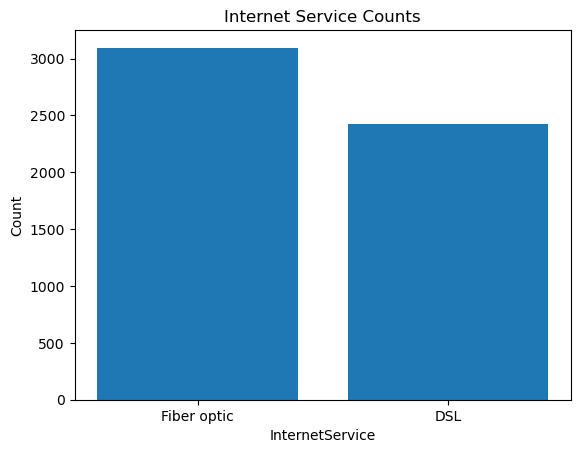

In [19]:
print(internet['InternetService'].value_counts())
plt.bar(internet['InternetService'].value_counts().index, internet['InternetService'].value_counts().values)
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Internet Service Counts')
plt.show()

In [20]:
internet_dsl = internet[internet['InternetService'] == 'DSL']
internet_foptik = internet[internet['InternetService'] == 'Fiber optic']

In [21]:
internet_dsl.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No


In [22]:
internet_foptik.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
11,8091-TTVAX,Fiber optic,No,No,Yes,No,Yes,Yes


In [23]:
internet_of_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

def internet_services(data):
    value_counts_df = pd.DataFrame()
    for column in internet_of_services:
        value_counts_df[column] = data[column].value_counts()
    print(value_counts_df)

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i, column in enumerate(internet_of_services):
        row = i // 3
        col = i % 3
        data[column].value_counts().plot(kind='bar', ax=axs[row, col])
        axs[row, col].set_xlabel(column)
        axs[row, col].set_ylabel('Count')
        axs[row, col].set_title(f'Internet of Services {column}')
    

    plt.tight_layout()
    plt.show()


     OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
No             1241          1335              1356         1243         1464   
Yes            1180          1086              1065         1178          957   

     StreamingMovies  
No              1440  
Yes              981  


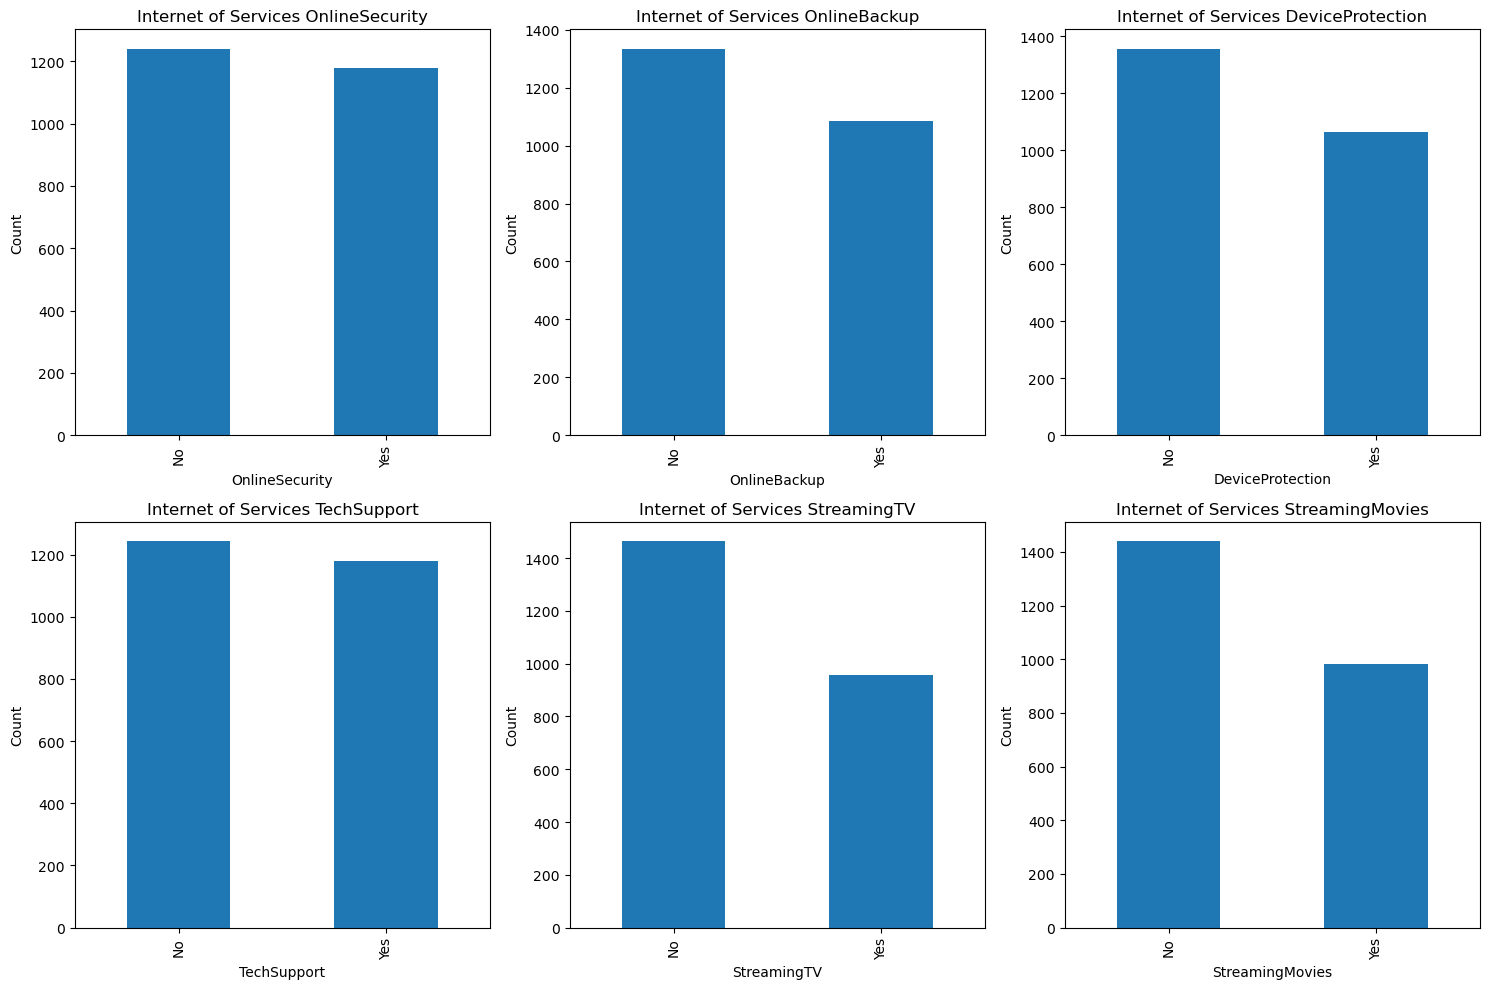

In [24]:
internet_services(internet_dsl)

     OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
No             2257          1753              1739         2230         1346   
Yes             839          1343              1357          866         1750   

     StreamingMovies  
No              1345  
Yes             1751  


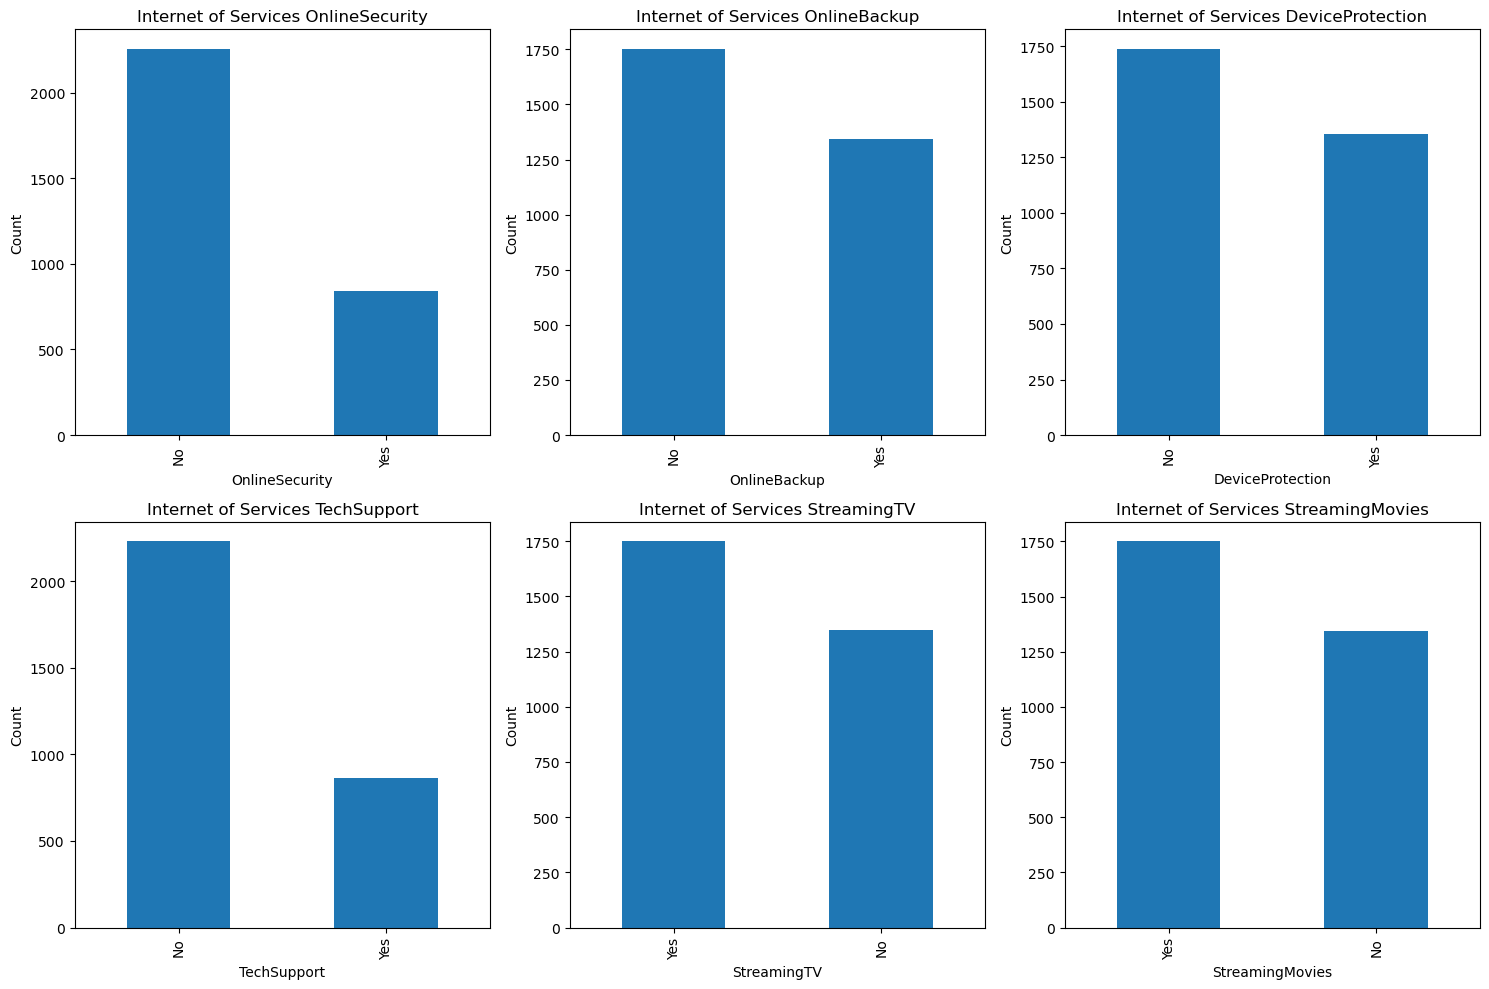

In [25]:
internet_services(internet_foptik)

**Temuan**

1. Terdapat 5517 pelanggan yang memiliki paket internet.
2. Tedapat 3096 pelanggan yang memilih menggunakan Fiber optic, dan 2421 pelanggan yang memilih DSL sebagai jaringan yang digunakan.
3. Pelanggan yang memilih fiber optic sebagai jalur jaringannya, mereka memaksimalkan layanan yang ada pada paket perusahaan, seperti OnlineBackup,DeviceProtection,StreamingTV dan StreamingMovies. Sedangkan rata-rata pelanggan yang menggunakan DSL sebagai jalur jaringannya, mereka hanya unggul di bagian OnlineSecurity dan TechSupport.  

**3. Data3 - contract**

Dari catatan sebelumn didapat:
- Kolom BeginDate dan EndDate tipe datanya object (dapat dirubah ke datetime).
- Kolom TotalCharges tipe datanya object (dapat dirubah ke float).

Untuk memastikannya mari tampilkan datanya.

In [26]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [27]:
contract['BeginDate'].value_counts()

2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: BeginDate, Length: 77, dtype: int64

In [28]:
contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

In [29]:
contract['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [30]:
contract['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

Dari data diatas, terlihat ada 2 kolom yang dapat diganti tipe datannya menjadi datetime, namun pada kolom `TotalCharges` tipe datanya dapat dirubah ke float. Untuk kolom ini ternyata ada sedikit yang unik, terdapat string kosong didalamya. Itu berarti pada kolom ini terdapat missing value. Untuk mengatasi missing value ini dapat diisi sementara dengan NA selagi merubah tipe datanya.  Mari perbaiki tipe data pada ketiga kolom tersebut.

In [31]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d', errors='coerce')   


In [32]:
contract['TotalCharges'] = contract['TotalCharges'].replace(' ', np.nan)

In [33]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float')

In [34]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [35]:
contract.isna().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

In [36]:
contract_endate_nan = contract[contract['EndDate'].isna()]
contract_endate_full = contract[~contract['EndDate'].isna()]

In [37]:
contract_endate_nan.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
6,1452-KIOVK,2018-04-01,NaT,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,6713-OKOMC,2019-04-01,NaT,Month-to-month,No,Mailed check,29.75,301.90


In [38]:
contract_endate_full.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01,Month-to-month,Yes,Electronic check,99.65,820.50
8,7892-POOKP,2017-07-01,2019-11-01,Month-to-month,Yes,Electronic check,104.80,3046.05
13,0280-XJGEX,2015-09-01,2019-10-01,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [39]:
contract_endate_nan['MonthlyCharges'].describe(), contract_endate_full['MonthlyCharges'].describe()

(count    5174.000000
 mean       61.265124
 std        31.092648
 min        18.250000
 25%        25.100000
 50%        64.425000
 75%        88.400000
 max       118.750000
 Name: MonthlyCharges, dtype: float64,
 count    1869.000000
 mean       74.441332
 std        24.666053
 min        18.850000
 25%        56.150000
 50%        79.650000
 75%        94.200000
 max       118.350000
 Name: MonthlyCharges, dtype: float64)

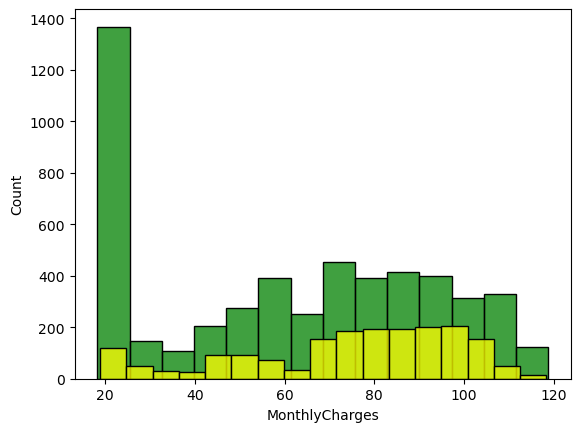

In [40]:
sns.histplot(contract_endate_nan['MonthlyCharges'], color='green')
sns.histplot(contract_endate_full['MonthlyCharges'], color='yellow')
plt.show()

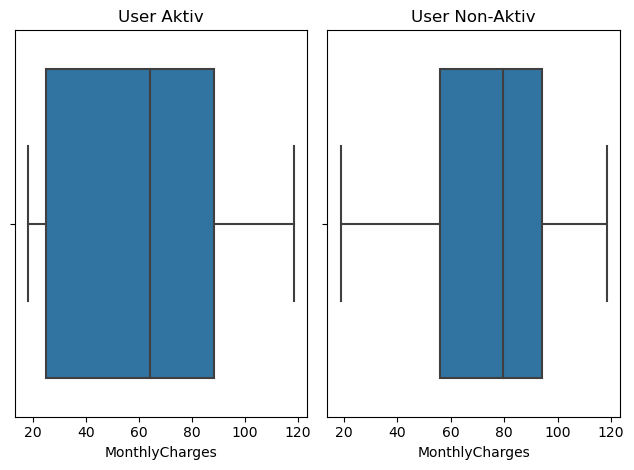

In [41]:
plt.subplot(1,2,1)
plt.title('User Aktiv')
sns.boxplot(contract_endate_nan, x='MonthlyCharges')
plt.subplot(1,2,2)
plt.title('User Non-Aktiv')
sns.boxplot(contract_endate_full, x='MonthlyCharges')
plt.tight_layout()
plt.show()

**Temuan**

1. Dari grafik diatas terlihat bahwa jumlah pengguna aktif jauh lebih banyak dibandingkan dengan pengguna yang sudah tidak aktif.
2. Dari data pembayaran bulanan, rata-rata pengguna aktif melakukan pembayaran perbulan yaitu 61.265124, sedangkan pengguna tidak aktif sebesar 74.441332
3. Untuk pengguna aktif persebaran pembayaran bulananya berada sekitar 25-88, sedangkan untuk pengguna yang tidak aktif berada pada 55-95.

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


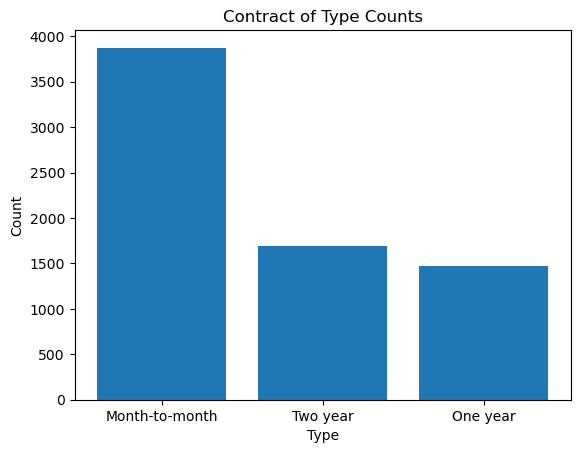

In [42]:
print(contract['Type'].value_counts())
plt.bar(contract['Type'].value_counts().index, contract['Type'].value_counts().values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Contract of Type Counts')
plt.show()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


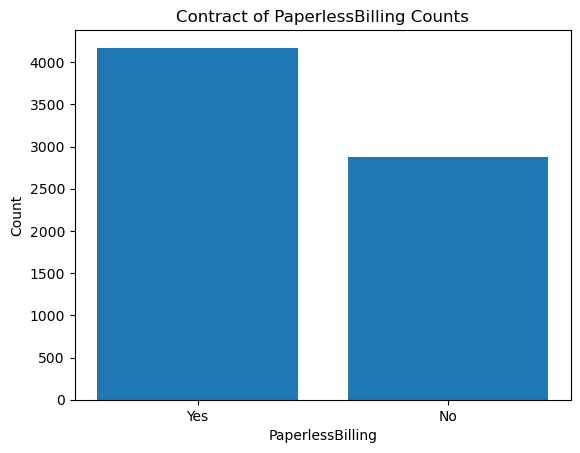

In [43]:
print(contract['PaperlessBilling'].value_counts())
plt.bar(contract['PaperlessBilling'].value_counts().index, contract['PaperlessBilling'].value_counts().values)
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.title('Contract of PaperlessBilling Counts')
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


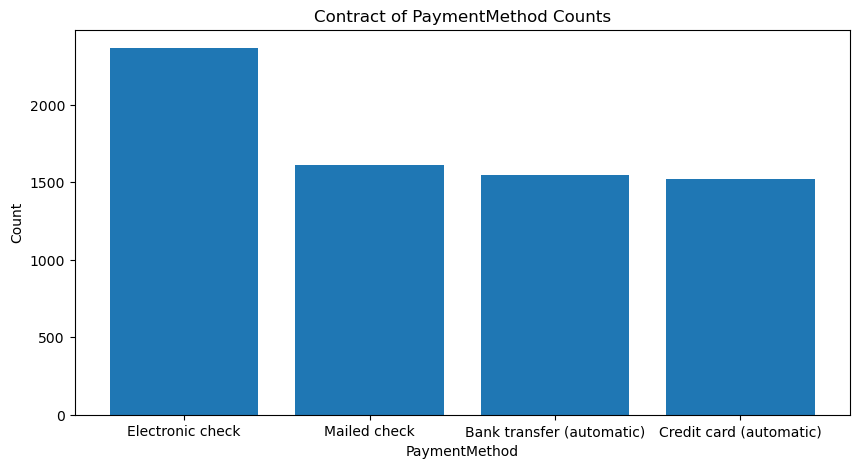

In [44]:
print(contract['PaymentMethod'].value_counts())
plt.figure(figsize=(10, 5))
plt.bar(contract['PaymentMethod'].value_counts().index, contract['PaymentMethod'].value_counts().values)
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.title('Contract of PaymentMethod Counts')
plt.show()

Describe of MonthlyCharges
 count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Describe of TotalCharges
 count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


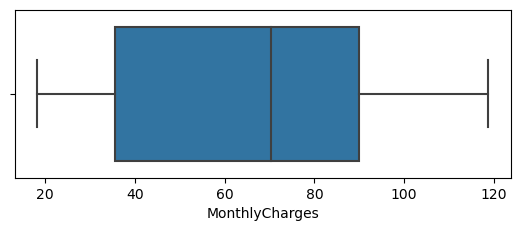

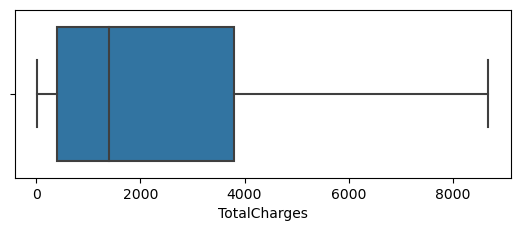

In [45]:
print('Describe of MonthlyCharges\n',contract['MonthlyCharges'].describe())
print()
print('Describe of TotalCharges\n',contract['TotalCharges'].describe())
plt.subplot(211)
sns.boxplot(x=contract['MonthlyCharges'])
plt.show()
plt.subplot(212)
sns.boxplot(x=contract['TotalCharges'])
plt.show()


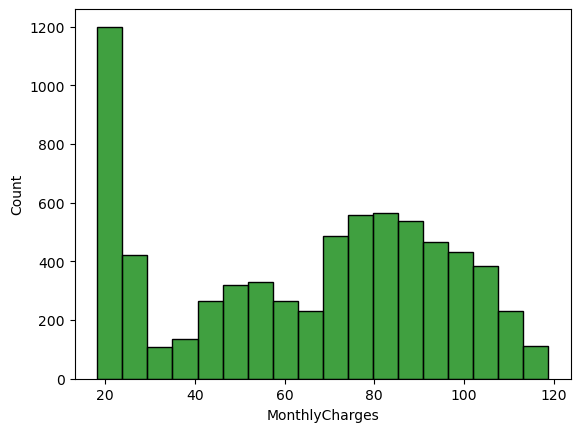

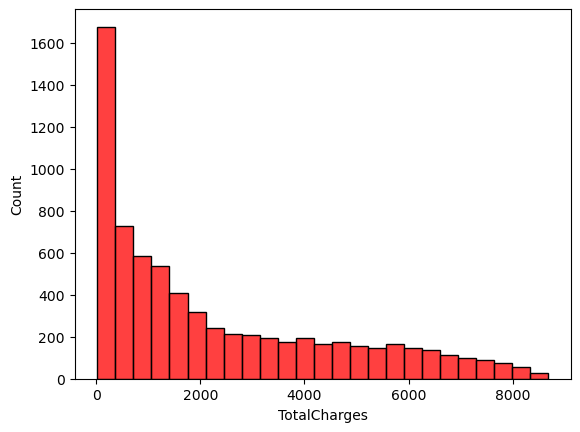

In [46]:
sns.histplot(contract, x='MonthlyCharges', color='green')
plt.show()
sns.histplot(contract, x='TotalCharges', color='red')
plt.show()


**Temuan**

1. Pengguna aktif lebih banyak dibandingkan dengan pengguna tidak aktif
2. Kebanyakan pengguna menyukai sistem PaperlesBilling
3. Lebih banyak pengguna yang menggunakan metode pembayaran electronic check dibandingkan dengan yang lainnya.
4. Persebaran data pembayaran bulanan berada disekitar 18 s/d 118, sedangkan pebanyaran total berada disekitar 18 s/d 8684. 

**4. Datae4 - personal**

Sesuai dengan catatan sebelumnya, mari tampilkan datanya

In [47]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Male      3555
Female    3488
Name: gender, dtype: int64


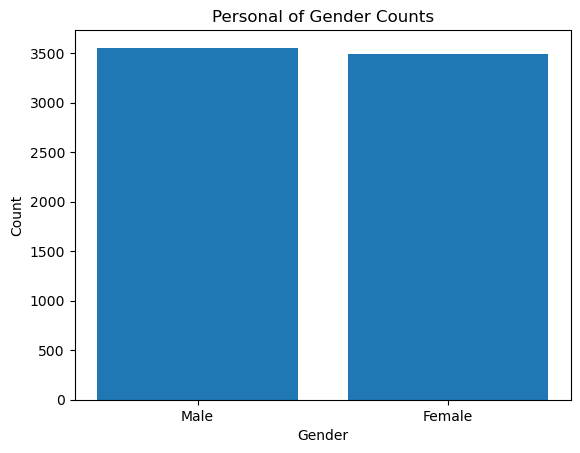

In [48]:
print(personal['gender'].value_counts())
plt.bar(personal['gender'].value_counts().index, personal['gender'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Personal of Gender Counts')
plt.show()

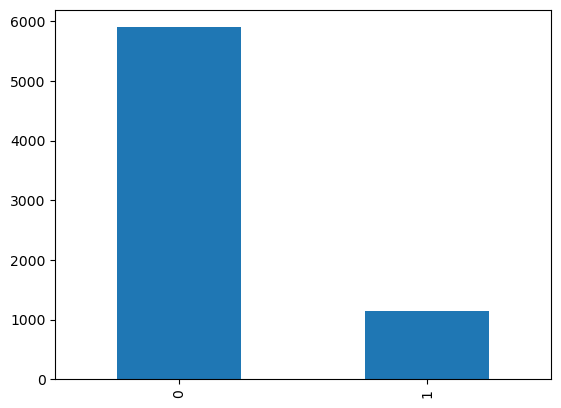

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [49]:
personal['SeniorCitizen'].value_counts().plot(kind='bar')
plt.show()
print(personal['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64


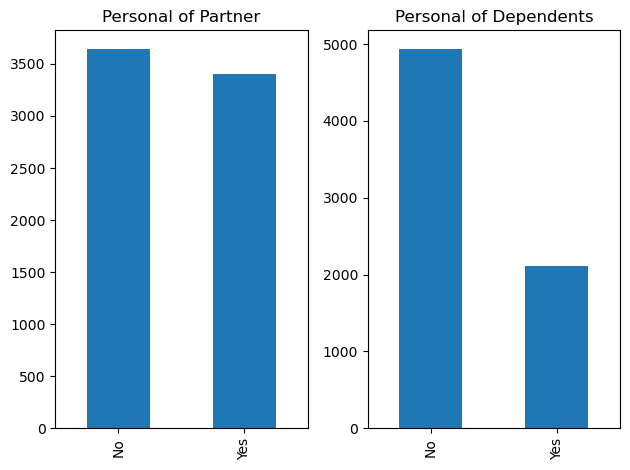

In [50]:
plt.subplot(1,2,1)
personal['Partner'].value_counts().plot(kind='bar')
plt.title('Personal of Partner')
print(personal['Partner'].value_counts())
plt.subplot(1,2,2)
personal['Dependents'].value_counts().plot(kind='bar')
plt.title('Personal of Dependents')
print(personal['Dependents'].value_counts())
plt.tight_layout()
plt.show()

**Temuan**

1. Pengguna dengan jenis kelamin laki-laki sedikit lebih besar dibandingkan dengan pengguna wanita, laki-laki sebesar 3555 orang, sedangkan wanita sebesar 3488 orang.
2. Kebanyakan dari pengguna adalah bukan dari kalangan senior cityzen.

# Kesimpulan

Ada beberapa kesimpulan yang dapat diambil dari langkah-langkah yang telah dilakukan, diantaranya:
1. User dari layanan telepon berjumlah 6361 user, dengan jumlah user yang menggunakan multiplelines berjumlah 2971 user, sedangkan yang tidak berjumlah 3390 user.
2. User dari layanan internet berjumlah 5517 user, dengan jumlah user yang menggunakan jaringan Fiber optic berjumlah 3096 user dan jaringan DSL berjumlah 2421 user.
3. Jumlah user yang sudah memiliki contract dengan Telekomunikasi Interlokasi adalah 7043 user.
4. Telihat didataset contract, jumlah user yang masih aktif adalah 5174 user dan yang sudah tidak aktif adalah 1869 user.
5. Rata-rata pengguna aktif melakukan pembayaran perbulan yaitu 61.265124, sedangkan pengguna tidak aktif sebesar 74.441332. Namun bila dilihat dari persebaran data pengguna aktif untuk pembayaran bulananya berada sekitar 25-88, sedangkan untuk pengguna yang tidak aktif berada pada 55-95. Pengguna tidak aktif jauh lebih sedikit dibandingkan dengan pengguna aktif.
6. Pengguna dengan jenis kelamin laki-laki sedikit lebih besar dibandingkan dengan pengguna wanita, laki-laki sebesar 3555 orang, sedangkan wanita sebesar 3488 orang dan kebanyakan dari pengguna yang ada adalah bukan dari kalangan senior cityzen.

# Daftar pertanyaan yang perlu diklarifikasi 󠀲󠀡󠀠󠀥󠀨󠀢󠀥󠀢󠀳

1. Maksud dari MultipeLines pada dataset phone?
2. Dataset personal menampung jumlah pengguna yang ada, namun pada saat dibandingkan dengan dataset phone dan internet jumlahnya melebihi penguna yang ada di personal, apakah pengguna dari phone juga termasuk didalam internet atau pun sebaliknya?
3. Ada 11 missing value pada dataset contract, apakah diizinkan untuk mengisinya dengan median? karena dilihat dari datanya, nilai median kemungkinan adalah nilai yang aman untuk dipakai?
4. Apakah benar nilai NaT atau missing value pada kolom EndDate di dataset contract adalah nilai yang akan diprediksi di model nanti. (Hanya untuk Konfirmasi saja)

# Rencana kasar dalam menyelesaikan tugas, tentukan 3-5 langkah dasar dan jelaskan setiap langkah tersebut dalam satu atau dua kalimat󠀲󠀡󠀠󠀥󠀨󠀢󠀥󠀣󠀳

1. Dengan membagi dataset yang ada kedalam beberapa kelompok, tergantung dari jawaban atas pertanyaan-pertanyaan diatas.
2. Dengan memanfaatkan Onehot-endcoder untuk mempermudah pada saat membuat model.
3. Membagi data menjadi 3 bagian yaitu trainset, validationset dan testset.
4. Membuat 2-3 model untuk dibandingkan kualitas modelnya dan bila perlu menggunakan metode upsampling atau downsampling untuk memudahkan proses membuat model. Dari model-model yang dilatih tersebut akan dipilih salahsatu model dengan kualitas yang lebih baik dari yang lainnya dan menggunakan model tersebut ke dalam testset.

# Preparing Data

Sebelum melakukan pelatihan pada data yang ada, mari siapkan terlebih dahulu data yang akan digunakan untuk pelatihan model.
Tujuna utama dari pelatihan model ini adalah untuk memperkirakan perpindahan klien, jika diketahui bahwa pengguna berencana keluar, mereka akan ditawari kode promosi dan opsi paket khusus. Oleh karena itu data yang akan digunakan adalah dataset contract.

In [51]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


In [52]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


In [53]:
contract.isna().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
dtype: int64

Terdapat missing value pada kolom `EndDate` dan juga `TotalCharges`. Untuk Kolom EndDate, missing value menandakan user yang masih aktif, oleh karena itu missing value pada kolom ini sementara dibiarkan terlebih dahulu. Pada kolom `TotalCharges` terdapat 11 mising value. MAri tamplikan detail dari kolom ini

In [54]:
contract['TotalCharges'].isna().sum()

11

In [55]:
contract['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Dari data diatas, missing valeu yang ada sementara dapat diisi dengan median dari kolom ini. Nilai median terlihat cukup aman untuk mengisi missing value yang ada.

In [56]:
contract['TotalCharges'] = contract['TotalCharges'].fillna(contract['TotalCharges'].median())
contract.isna().sum()


customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64

Missing value pada kolom `TotalCharges` sudah berhasil diisi dengan median dari kolom tersebut.
Mari gabungkan 2 dataset yang berisi data dari semua pengguna, dateset tersebut adalah personal dan juga contract.

In [57]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [58]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


Sebelum digabungkan, mari pastikan terlebih dahulu data dari `customerID` pada kedua dataset adalah sama.

In [59]:
set(list(personal['customerID'].values)) - set(list(contract['customerID'].values))

set()

Dari hasil diatas, tidak tersisa data dari customerID. Ini menandakan bahwa kedua dataset dapat digabungkan sesuai dengan colom `customerID`

In [60]:
personal_contract = personal.merge(contract, on='customerID')
personal_contract.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


Langkah selanjutya, mari perkaya data yang ada pada bagian `BeginDate` dan `EndDate` dan juga siapkan data yang diperlukan untuk proses pemodelan.

**1. Menambahkan kolom year, month, day berdasarkan BeginDate**

In [61]:
personal_contract['BeginDate_Year'] = personal_contract['BeginDate'].dt.year
personal_contract['BeginDate_Month'] = personal_contract['BeginDate'].dt.month
personal_contract['BeginDate_Day'] = personal_contract['BeginDate'].dt.day
personal_contract.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginDate_Year,BeginDate_Month,BeginDate_Day
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,2020,1,1
1,5575-GNVDE,Male,0,No,No,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,2017,4,1
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,2019,10,1
3,7795-CFOCW,Male,0,No,No,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,2016,5,1
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,2019,9,1


**2. Membuat One-hot Encoder pada beberapa kolom**

Kolom-kolom yang dimaksud adalah kolom:
- gender
- Partner
- Dependents
- Type
- PaperlessBilling  
- PaymentMethod    

In [62]:
personal_contract = pd.get_dummies(personal_contract, columns=['gender', 'Partner', 'Dependents', 'Type', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)
personal_contract.head()

,customerID,SeniorCitizen,BeginDate,EndDate,MonthlyCharges,TotalCharges,BeginDate_Year,BeginDate_Month,BeginDate_Day,gender_Male,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,2020-01-01,NaT,29.85,29.85,2020,1,1,0,1,0,0,0,1,0,1,0
1,5575-GNVDE,0,2017-04-01,NaT,56.95,1889.50,2017,4,1,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2019-10-01,2019-12-01,53.85,108.15,2019,10,1,1,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,2016-05-01,NaT,42.30,1840.75,2016,5,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2019-09-01,2019-11-01,70.70,151.65,2019,9,1,0,0,0,0,0,1,0,1,0


**3. Membuat kolom baru (`Exited`)**

Kolom ini akan dibuat sebagai kolom target untuk membedakan pengguna yang masih aktif (dapat diperpanjang) dan pengguna yang sudah tidak aktif. Sebelum itu mari panggil terlebih dahulu kelompok pengguna yang masih aktif dan yang sudah tidak aktif untuk memastikan nilai dari keduanya sama.

In [63]:
contract_endate_nan.shape, contract_endate_full.shape

((5174, 8), (1869, 8))

Terdapat 5174 pengguna aktif dan 1869 pengguna yang sudah tidak aktif.

In [64]:
personal_contract['Exited'] = personal_contract['EndDate'].notna().astype(int)
personal_contract['Exited'].value_counts()

0    5174
1    1869
Name: Exited, dtype: int64

Kolom `Exited` menyimpan nilai 0 untuk pengguna yang masih aktif dan 1 untuk pengguna yang sudah tidak aktif.

**4. Menghapus kolom-kolom yang tidak diperlukan**

In [65]:
data = personal_contract.copy()
data.head()

,customerID,SeniorCitizen,BeginDate,EndDate,MonthlyCharges,TotalCharges,BeginDate_Year,BeginDate_Month,BeginDate_Day,gender_Male,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Exited
0,7590-VHVEG,0,2020-01-01,NaT,29.85,29.85,2020,1,1,0,1,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,2017-04-01,NaT,56.95,1889.50,2017,4,1,1,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2019-10-01,2019-12-01,53.85,108.15,2019,10,1,1,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,2016-05-01,NaT,42.30,1840.75,2016,5,1,1,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2019-09-01,2019-11-01,70.70,151.65,2019,9,1,0,0,0,0,0,1,0,1,0,1


In [66]:
data = data.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)
data.sample(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,BeginDate_Year,BeginDate_Month,BeginDate_Day,gender_Male,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Exited
3997,0,61.45,4131.20,2014,5,1,0,1,0,0,1,1,1,0,0,0
3717,0,48.95,1323.70,2017,9,1,1,0,0,0,0,0,0,0,0,0
3882,0,44.80,176.20,2019,10,1,1,0,0,0,0,1,1,0,0,0
2849,0,20.30,246.70,2019,2,1,0,0,0,0,0,0,0,0,1,0
2670,0,95.15,5000.05,2015,11,1,0,1,1,1,0,1,0,0,1,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   BeginDate_Year                         7043 non-null   int64  
 4   BeginDate_Month                        7043 non-null   int64  
 5   BeginDate_Day                          7043 non-null   int64  
 6   gender_Male                            7043 non-null   uint8  
 7   Partner_Yes                            7043 non-null   uint8  
 8   Dependents_Yes                         7043 non-null   uint8  
 9   Type_One year                          7043 non-null   uint8  
 10  Type_Two year                          7043 non-null   uint8  
 11  Pape

In [68]:
data.isna().sum()

SeniorCitizen                            0
MonthlyCharges                           0
TotalCharges                             0
BeginDate_Year                           0
BeginDate_Month                          0
BeginDate_Day                            0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
Type_One year                            0
Type_Two year                            0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Exited                                   0
dtype: int64

In [69]:
class_distribution = data['Exited'].value_counts() / data.shape[0] * 100

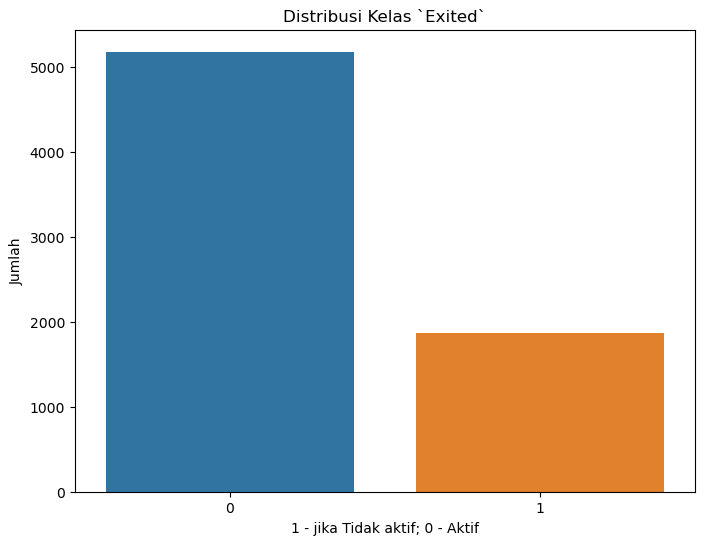

Persentase Kelas Distribusi `Exited`:
0    73.463013
1    26.536987
Name: Exited, dtype: float64


In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x='Exited', data=data)
plt.title('Distribusi Kelas `Exited`')
plt.xlabel('1 - jika Tidak aktif; 0 - Aktif')
plt.ylabel('Jumlah')
plt.show()
print('Persentase Kelas Distribusi `Exited`:')
print(class_distribution)

**Catatan**

Dari preparing data yang telah dilakukan, didapat beberapa catatan diantaranya:
1. Dataset yang akan digunakan untuk paltihan model adalah contract dan personal.
2. Missing value pada dataset contract kolom `TotalCharges` diisi dengan median dari kolom tersebut.
3. Dataset contract dan personal digabungkan menggunakan merge() sesuai dengan kolom customerID
4. Memperkaya dataset dengan beberapa cara:
    - Menambah kolom month, year, day berdasarkan kolom BeginDate
	- Membuat One-hot Endcoder pada beberapa kolom yang diperlukan
	- Membuat kolom baru dengan tujuna membedakan antara pengguna aktif dan juga tidak aktif.
5. Grafik class distribusi menyatakan bahwa terdapat 73.5% pengguna aktif dan juga 26.5% pengguna yang tidak aktif.

# Pemodelan

Import library untuk pelatihan model

In [71]:
# model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# split data
from sklearn.model_selection import train_test_split

# metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle

Sebelum melakukan pelatihan, mari bagi dataset yang ada menjadi 3 bagian yaitu: train_set, validation_set, dan test_set.

In [72]:
# Split dataset 
train_valid, test = train_test_split(data, test_size=0.1) 
train, valid = train_test_split(train_valid, test_size=0.1) 

train.shape, valid.shape, test.shape

((5704, 16), (634, 16), (705, 16))

In [73]:
# training set, validation set, dan test set.

features_train = train.drop(['Exited'], axis=1)
target_train = train['Exited']

features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']

features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

In [74]:
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)
print(features_test.shape, target_test.shape)

(5704, 15) (5704,)
(634, 15) (634,)
(705, 15) (705,)


Pada tahap ini pelatihan model akan menggunakan beberapa model agar dapat dibandingkan model mana yang memiliki nilai terbaik. Model yang akan digunakan pada penelitian kali ini yaitu:

- Logistic Regression.
- Decision Tree Classifier.
- Random Forest Classifier.

**1. Logistic Regression**

In [75]:
# Model Logistic Regression
list_penalty = ['l1', 'l2']
for penalty in list_penalty:
    model_logreg = LogisticRegression(random_state=12345, penalty=penalty, solver='liblinear')
    model_logreg.fit(features_train, target_train)

    predicted_model = model_logreg.predict(features_valid)
    probabilities_valid = model_logreg.predict_proba(features_valid)[:, 1]

    print('Penalty:', penalty)
    print('Accuracy Score:', accuracy_score(target_valid, predicted_model))
    print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('__________________________')

Penalty: l1
Accuracy Score: 0.7886435331230284
AUC-ROC: 0.8233166684395277
__________________________
Penalty: l2
Accuracy Score: 0.7870662460567823
AUC-ROC: 0.8216014253802787
__________________________


**2. Decision Tree Classifier**

In [76]:
# Model Decision Tree Classifier
list_max_depth = [1,2,4,6,8]

for depth in list_max_depth:
    model_Dtree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_Dtree.fit(features_train, target_train)
    
    predicted_model = model_Dtree.predict(features_valid)
    probabilities_valid = model_Dtree.predict_proba(features_valid)[:, 1]

    print('max_depth:', depth)
    print('Accuracy Score:', accuracy_score(target_valid, predicted_model))
    print('ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('______________________________')
    

max_depth: 1
Accuracy Score: 0.750788643533123
ROC: 0.6470189341559409
______________________________
max_depth: 2
Accuracy Score: 0.750788643533123
ROC: 0.7411578555472822
______________________________
max_depth: 4
Accuracy Score: 0.7839116719242902
ROC: 0.8088634187852356
______________________________
max_depth: 6
Accuracy Score: 0.8107255520504731
ROC: 0.856271939155409
______________________________
max_depth: 8
Accuracy Score: 0.8296529968454258
ROC: 0.8574287309860652
______________________________


**3. Random Forest Classifier**

In [77]:
# Model Random Forest Classifier
range_estimators = range(10, 101, 10)

for esti in range_estimators:
    model_Rforest = RandomForestClassifier(random_state=12345, n_estimators=esti)
    model_Rforest.fit(features_train, target_train)

    predicted_model = model_Rforest.predict(features_valid)
    probabilities_valid = model_Rforest.predict_proba(features_valid)[:, 1]

    print('n_estimators:', esti)
    print('Accuracy Score:', accuracy_score(target_valid, predicted_model))
    print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
    print('_____________________________')

n_estimators: 10
Accuracy Score: 0.8107255520504731
AUC-ROC: 0.8511062652909265
_____________________________
n_estimators: 20
Accuracy Score: 0.8249211356466877
AUC-ROC: 0.8596492394426125
_____________________________
n_estimators: 30
Accuracy Score: 0.831230283911672
AUC-ROC: 0.8716891820019146
_____________________________
n_estimators: 40
Accuracy Score: 0.8375394321766562
AUC-ROC: 0.8716958302308264
_____________________________
n_estimators: 50
Accuracy Score: 0.832807570977918
AUC-ROC: 0.8720548345920647
_____________________________
n_estimators: 60
Accuracy Score: 0.8359621451104101
AUC-ROC: 0.8742686948197
_____________________________
n_estimators: 70
Accuracy Score: 0.8375394321766562
AUC-ROC: 0.8742819912775237
_____________________________
n_estimators: 80
Accuracy Score: 0.8359621451104101
AUC-ROC: 0.8741556749281992
_____________________________
n_estimators: 90
Accuracy Score: 0.8359621451104101
AUC-ROC: 0.8725002659291565
_____________________________
n_estimators: 1

**Catatan**

Dari ketiga model yang dilatih, didapat model dengan nilai AUC_ROC terbaik adalah Random Forest Classifier dengan n_estimators 100. Untuk nilai yang didapat adalah :
- Accuracy Score = 0.8328
- AUC-ROC: 0.8713

# Pengujian Terakhir

Mari tampilkan kembali model Random Forest Classifier dengan n_estimators 100.

In [79]:
model_final = RandomForestClassifier(random_state=12345, n_estimators=100)
model_final.fit(features_train, target_train)

predicted_model = model_final.predict(features_valid)
probabilities_valid = model_final.predict_proba(features_valid)[:, 1]

print('n_estimators:', 100)
print('Accuracy Score:', accuracy_score(target_valid, predicted_model))
print('AUC-ROC:', roc_auc_score(target_valid, probabilities_valid))
print('_____________________________')

n_estimators: 100
Accuracy Score: 0.832807570977918
AUC-ROC: 0.8713634187852356
_____________________________


Pengujian terakhir yaitu menggunakan test set.

In [80]:
predicted_model_test = model_final.predict(features_test)
probabilities_test = model_final.predict_proba(features_test)[:, 1]

print('n_estimators:', 100)
print('Accuracy Score:', accuracy_score(target_test, predicted_model_test))
print('AUC-ROC:', roc_auc_score(target_test, probabilities_test))
print('_____________________________')

n_estimators: 100
Accuracy Score: 0.8539007092198582
AUC-ROC: 0.8866995073891625
_____________________________


Hasil yang didapat dari model Random Forest Classifier dengan n_estimators 100 pada test set adalah:
- Accuracy Score: 0.8539
- AUC-ROC: 0.8866

# Kesimpulan Umum

In [112]:
print('Pengguna Telepon:', phone['customerID'].count(), 'User')
print('Pengguna Internet:', internet['customerID'].count(), 'User')

Pengguna Telepon: 6361 User
Pengguna Internet: 5517 User


Dari langkah-langkah yang telah dilakukan didapat kesimpulan sebagai berikut:
1. Terdapat Pengguna Telepon sebanyak 6361 user, dengan 2971 user menggunakan multiplelines dan 3390 user yang tidak menggunakan multiplelines. 
2. Terdapat Pengguna Internet sebanyak 5517 User, dengan 3096 user menggunakan Fiber optic sebagai jaringanya dan 2421 user menggunakan DSL sebagai jaringannya.
3. Terdapat 5174 user pengguna aktif dan 1869 pengguna yang sudah tidak aktif.
4. Persebaran data untuk pembayaran bulanan pengguna aktif berada pada 20-120 dengan persentil 25%: 25 USD dan 75%: 88 USD. Untuk persebaran data pembayaran bulanan pengguna tidak aktif berada pada 20-120 dengan persentil 25%: 56 USD dan 75%: 94 USD. Pengguna aktif rata-rata memiliki pembayaran bulan sebesar 61 USD sedangkan rata-rata pengguna tidak aktif sebesar 74 USD.
5. Pelatihan model menggunakan 3 model yang berbeda yaitu Logistic Regression, Decision Tree Classifier, Random Forest Classifier.
6. Model dengan nilai AUC-ROC terbaik adalah model Random Forest Classifier dengan n_estimators 100.
7. Pengujian terakhir dilakukan pada test set dan didapat hasil sebagai berikut:
    - Accuracy Score: 0.8539
    - AUC-ROC: 0.8866